main crop script

In [ ]:
import os,yaml,shutil,cv2
from itertools import chain

cropped_folder_path = "./cropped2"
dataset_path = "./dataset"

if not os.path.exists(cropped_folder_path):
    os.makedirs(cropped_folder_path)

#resized_path = "reshaped/"

my_dict = {}
rem_dict ={} 

##########read yaml file to get class information #################

for file_names in os.listdir(dataset_path):
    if file_names.endswith(".yaml"):
        yaml_path = dataset_path+"/"+file_names
        #yaml_path = os.path.join(dataset_path,file_names)

with open(yaml_path, 'r') as file:
    # load the contents of the file into a Python object
    data = yaml.load(file, Loader=yaml.FullLoader)
class_yaml = data["names"]

##########################################################
#create rem_dictionary , for each class, add files names which has contain that class labels in it 

for class_name in class_yaml:
    rem_dict.setdefault(class_name, [])
    my_dict.setdefault(class_name, {})
    my_dict[class_name].update({"images":{},"cropped_logo_images":[],"average_size":{},"counter":1})

###################################################

process_counter = 0

for my_folder in os.listdir(dataset_path):
    #check if file is folder 
    #sub_folder = os.path.join(dataset_path, my_folder)
    sub_folder = dataset_path+"/"+my_folder
    if os.path.isdir(sub_folder):
        for txt_file_name in os.listdir(sub_folder+"/labels"):

            #img_name_short = txt_file_name.split('_')[0]
            jpg_path = sub_folder+"/images/"+ txt_file_name.replace('.txt', '.jpg')
  
            img = cv2.imread(jpg_path)
            try:
                
                with open(sub_folder+"/labels/"+txt_file_name) as f:
                    lines = f.read().strip().split('\n')
                
                for line in lines:
                    process_counter +=1
                    if process_counter %100 ==0:
                        print(process_counter)
                    
                    class_order, x, y, w, h = line.strip().split()
                    label_name = class_yaml[int(class_order)]
                    x, y, w, h = float(x), float(y), float(w), float(h)
                    x1, y1, x2, y2 = round((x-w/2) * 1280), round((y-h/2) * 720), round((x+w/2) * 1280), round((y+h/2) * 720)
                    
                    #image cropping and saving 
                    
                    
                    counter = my_dict[label_name]["counter"]

                    cropped_img_name = f"{label_name}_{counter}.jpg"
                    #cropped_img_path = os.path.join(cropped_folder_path, cropped_img_name)
                    cropped_img_path = cropped_folder_path+"/"+cropped_img_name

                    my_dict[label_name]["cropped_logo_images"].append({"cropped_path":cropped_img_path,"size":{"x":x2-x1,"y":y2-y1},"source_image":jpg_path})
                    
                    #my_dict[label_name]["cropped_logo_images"].update({cropped_img_path:{"size":{"x":x2-x1,"y":y2-y1},"source_image":jpg_path}})
                    
                    rem_dict[label_name].append(sub_folder+"/images/"+ txt_file_name.replace('.txt', '.jpg'))

                    my_dict[label_name]["counter"] += 1
                    cropped_img = img[y1:y2, x1:x2]
                    cv2.imwrite(cropped_img_path, cropped_img)

            except ValueError:
                print("error","image doesnt have logo")
                pass

##################################################################        
#to add images from rem_dict
for i in rem_dict:
    my_dict[i].update({"images":rem_dict[i]})
del rem_dict

#GET AVERAGE OF CROPPED SIZE BY CLASS#
##################################################################
for q in my_dict:
    x_sum,y_sum=0,0
    for m in my_dict[q]["cropped_logo_images"]:
        div = len(my_dict[q]["cropped_logo_images"])
        #used for {} cropped images
        #x_sum += my_dict[q]["cropped_logo_images"][m]["size"]["x"]

        x_sum += m["size"]["x"]
        y_sum += m["size"]["y"]
    x_avg, y_avg = round(x_sum/div), round(y_sum/div)
    my_dict[q]["average_size"].update({"x":x_avg,"y":y_avg})
#####################################################################
#to clear duplicate image names in images dict
for classes in my_dict:
    my_dict[classes]["images"] = [*{*my_dict[classes]["images"]}]

#############Reshaping cropped imaged in scale of average #############
"""counter = 0
for clas_name in my_dict:
    #avg_size =  (my_dict[clas_name]["average_size"]["x"],my_dict[clas_name]["average_size"]["y"])

    avg_size =  (round(my_dict[clas_name]["average_size"]["x"]), round(my_dict[clas_name]["average_size"]["y"]))

    #print(avg_size)
    for image_path in my_dict[clas_name]["cropped_logo_images"]:
    
        img = cv2.imread(image_path["cropped_path"])  
        img_resized = cv2.resize(img, avg_size)
        cv2.imwrite(image_path["cropped_path"], img_resized)

        counter+=1
        if counter%100 ==0:
            print(counter,"image are resized")
"""

aims to do 

In [ ]:
# dict A101 ve içerisinde tüm croplanmış logoları barındırıyor.

# feature extraction algorithm

def uniquefiy(class_name):
    for image_d in d[class_name]["cropped_images"]:
        image_d.setdefault("image",
        cv2.imread(image_d["path"])) 

        key, des = image_d["image"] # bunu feature extraction algoritmasına vericeksin
        image_d["key_points"], image_d["kp_description"], 
        # key ve desi dicte kaydet

    # 20 tane logo varsa 
    for ile içerisinde döneceksin tersinden başlayacaksın:
        kp, kp_des
        for 0 -> i 
            kp, kp_des
            similarity_score()
            100
            image_d["unique"] = False
            


   # tüm resimleri load yapacaksın.
   # croppedimage = [{path, size, image: cv2.imread("path")}]


In [ ]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

import yaml
with open("dataset/data.yaml", 'r') as file:
    # load the contents of the file into a Python object
    data = yaml.load(file, Loader=yaml.FullLoader)
class_yaml = data["names"]

##########################################################
#create rem_dictionary , for each class, add files names which has contain that class labels in it 
new_dict = {}
for class_name in class_yaml:
    #rem_dict.setdefault(class_name, [])
    new_dict.setdefault(class_name, {})
    new_dict[class_name].update({"images":{},"cropped_logo_images":[],"average_size":{},"counter":1})


In [ ]:
def matcher(img1, img2):
    sift = cv2.SIFT_create() 


    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    bf = cv2.BFMatcher()

    matches = bf.knnMatch(des1, des2, k=2)
    

    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append([m])
    
    img3 = cv2.drawMatchesKnn(img1, kp1,img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.imshow(img3[...,::-1]) #rgb conversation
    plt.show()
    

    return round((len(good_matches) / (len(kp1))) * 100)

In [ ]:
def matcher_txt(img1, img2):
    sift = cv2.SIFT_create() 


    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    bf = cv2.BFMatcher()

    matches = bf.knnMatch(des1, des2, k=2)
    

    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append([m])
    
    img3 = cv2.drawMatchesKnn(img1, kp1,img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    #plt.imshow(img3[...,::-1]) #rgb conversation
    #plt.show()
    

    return round((len(good_matches) / (len(kp1))) * 100)

In [ ]:

size = "original"
path_list = os.listdir(f"matching_test/{size}")
counter = 0
a = cv2.imread("matching_test/full.png")

for i in path_list:

    #a = cv2.imread(f"matching_test/{size}/a101-logo_2.jpg")
    b = cv2.imread(f"matching_test/{size}/{i}")
    a_resized = cv2.resize(a, (b.shape[1],b.shape[0]))
    match = matcher(a,b)

    match2 = matcher(a_resized,b)
    #my_dict[size].append(match)
    #if match > 50:
    print(f" 'logo_1' match '{i[:9]}' = %",match)

    print(f" 'logo_1' match2 '{i[:9]}' = %",match2,"\n")

    counter +=1
    #print(counter)

In [ ]:

size = "original"
path_list = os.listdir(f"matching_test/{size}")
counter = 0

a = cv2.imread("matching_test/papara_1.jpg")

for i in path_list:

    b = cv2.imread(f"matching_test/{size}/{i}")
    a_resized = cv2.resize(a, (b.shape[1],b.shape[0]))


    match = matcher(a,b)
    match2 = matcher(a_resized,b)

    #my_dict[size].append(match)
    if match > 0:
        print(f" 'logo_1' match '{i[:9]}' = %",match)

        print(f" 'logo_1' match2 '{i[:9]}' = %",match2,"\n")

    counter +=1
    #print(counter)

In [ ]:

size = "original"
avg_size = (138,44)

path_list = os.listdir(f"matching_test/{size}")
counter = 0


a = cv2.imread("matching_test/papara_1.jpg")

for i in path_list:

    b = cv2.imread(f"matching_test/{size}/{i}")

    if b.shape[1] > 138:
        b_resized  = cv2.resize(b,(150,60)) 
    else:
        b_resized  = cv2.resize(b,(75,30)) 
    
    if a.shape[1] > 138:
        a_2  = cv2.resize(a,(150,60)) 
    else:
        a_2  = cv2.resize(a,(75,30)) 

    a_resized = cv2.resize(a, (b_resized.shape[1],b_resized.shape[0]))

    match3 = matcher_txt(a_2,b_resized)
    match = matcher_txt(a,b_resized)
    match2 = matcher_txt(a_resized,b_resized)

    #my_dict[size].append(match)
    filter = 60
    if match > filter or match2>filter:
        print(f" 'logo_1' match '{i[:9]}' = %",match)
        print(f" 'logo_1' match2 '{i[:9]}' = %",match2)
        print(f" 'logo_1' match3 '{i[:9]}' = %",match3,"\n")

    counter +=1
print(counter)



In [ ]:
def pre_process(img):
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_padded = np.pad(img_gray,((10,10),(8,8)),constant_values=(255,255))
    ret,thresh = cv2.threshold(img_padded,180,255,cv2.THRESH_BINARY)
    blur = cv2.blur(thresh,(3,3))
    return blur



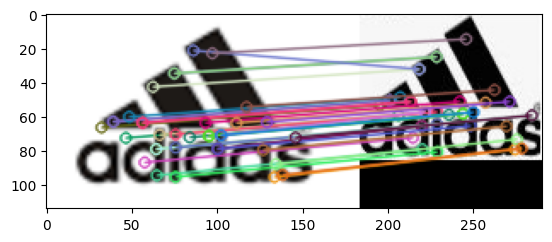

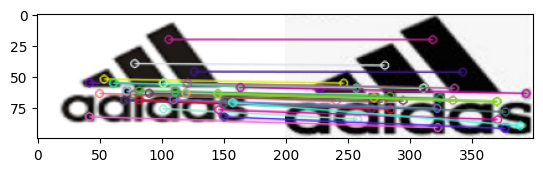

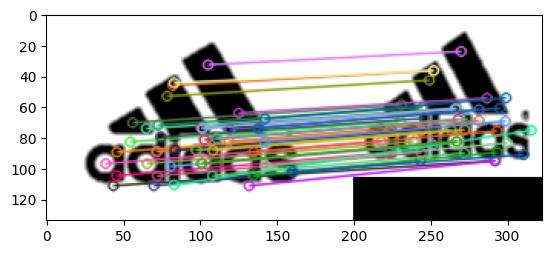

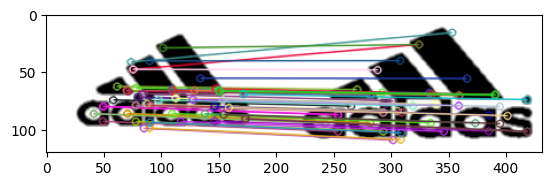

 'logo_1' match 'adidas_4.' = % 56
 'logo_1' match2 'adidas_4.' = % 47
 'logo_1' match2 'adidas_4.' = % 52
 'logo_1' match2 'adidas_4.' = % 55


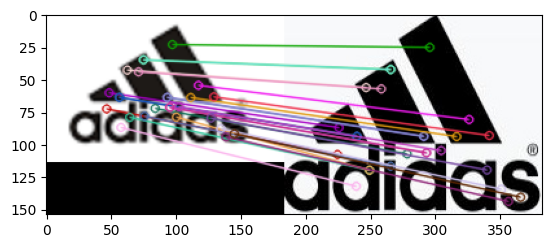

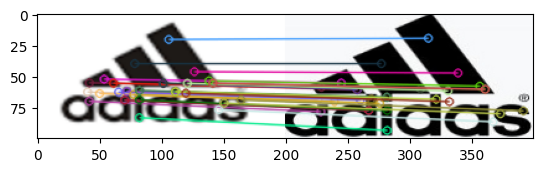

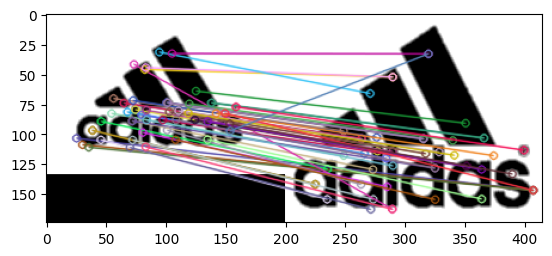

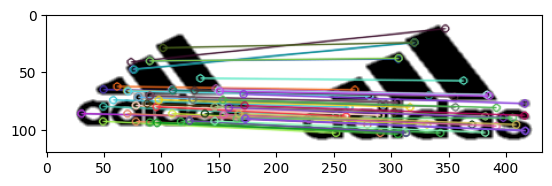

 'logo_1' match 'adidas_5.' = % 38
 'logo_1' match2 'adidas_5.' = % 44
 'logo_1' match2 'adidas_5.' = % 61
 'logo_1' match2 'adidas_5.' = % 58


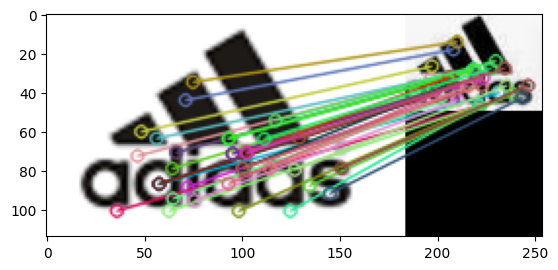

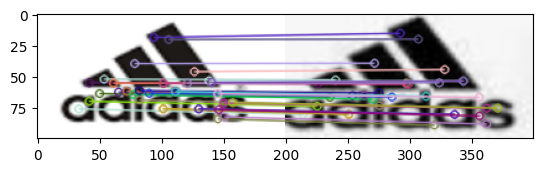

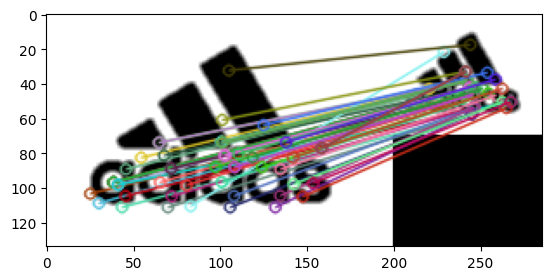

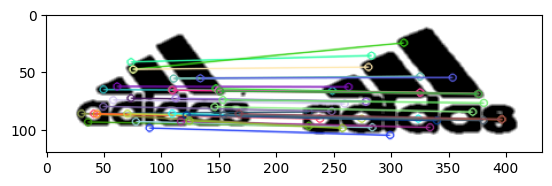

 'logo_1' match 'adidas_7.' = % 50
 'logo_1' match2 'adidas_7.' = % 49
 'logo_1' match2 'adidas_7.' = % 59
 'logo_1' match2 'adidas_7.' = % 36


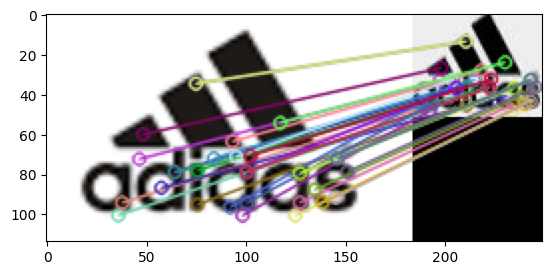

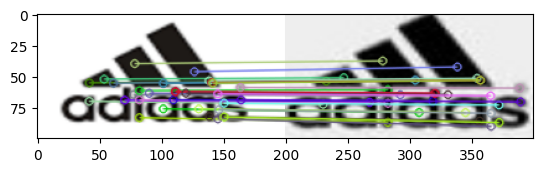

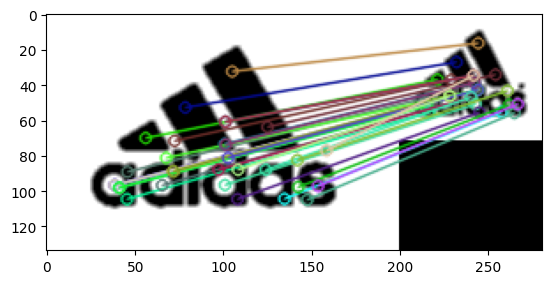

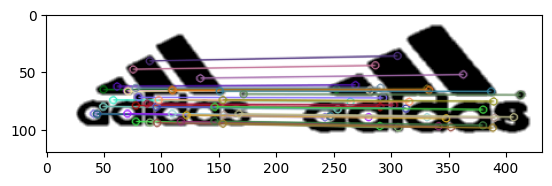

 'logo_1' match 'adidas_6.' = % 46
 'logo_1' match2 'adidas_6.' = % 46
 'logo_1' match2 'adidas_6.' = % 39
 'logo_1' match2 'adidas_6.' = % 40


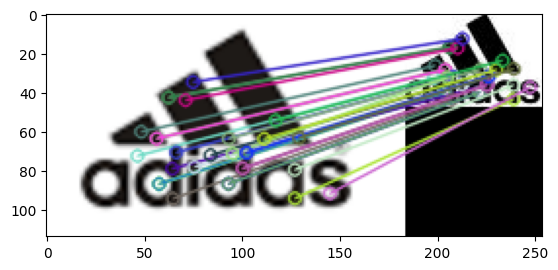

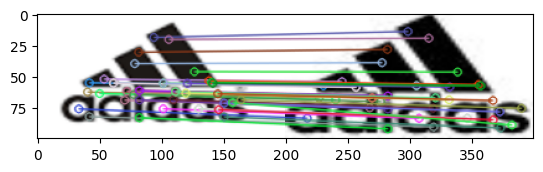

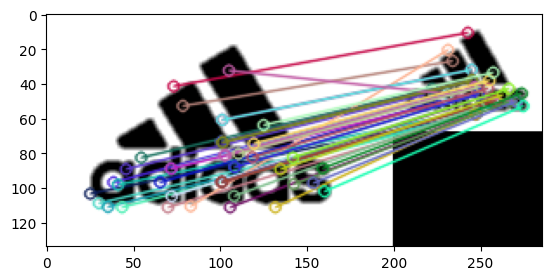

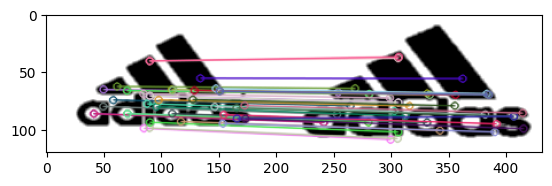

 'logo_1' match 'adidas_2.' = % 44
 'logo_1' match2 'adidas_2.' = % 57
 'logo_1' match2 'adidas_2.' = % 52
 'logo_1' match2 'adidas_2.' = % 40


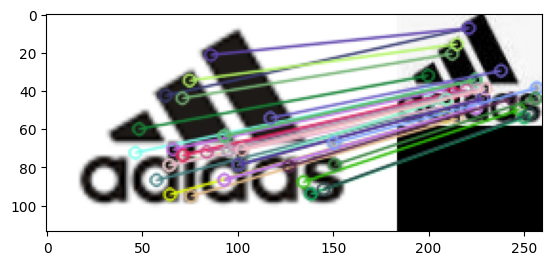

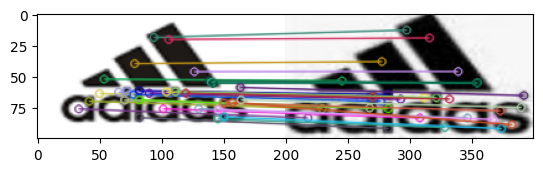

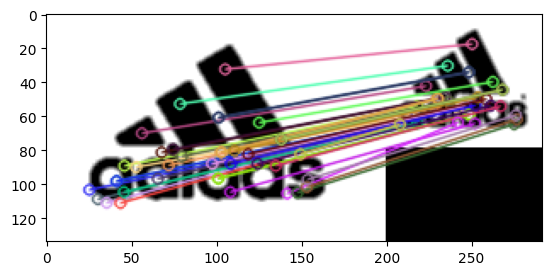

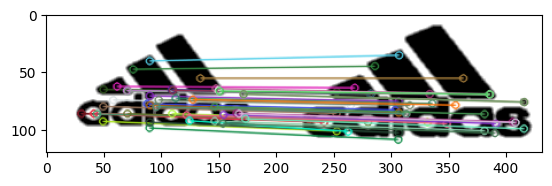

 'logo_1' match 'adidas_3.' = % 46
 'logo_1' match2 'adidas_3.' = % 49
 'logo_1' match2 'adidas_3.' = % 45
 'logo_1' match2 'adidas_3.' = % 47


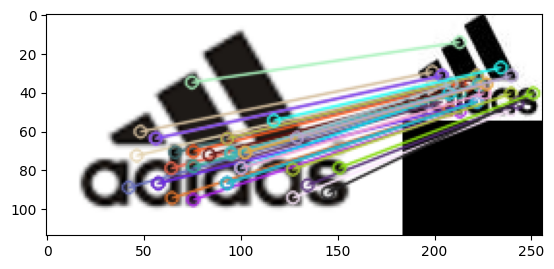

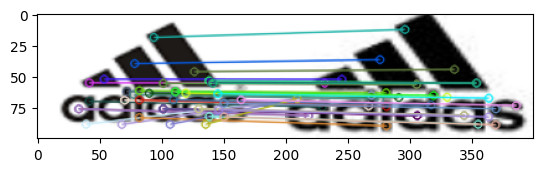

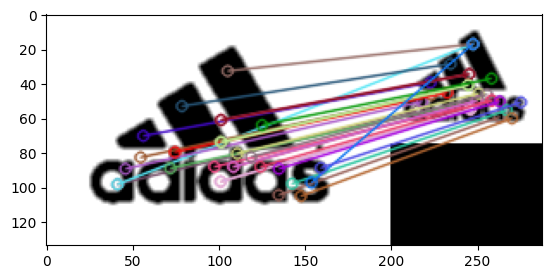

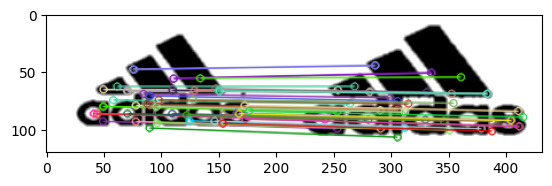

 'logo_1' match 'adidas_1.' = % 47
 'logo_1' match2 'adidas_1.' = % 59
 'logo_1' match2 'adidas_1.' = % 33
 'logo_1' match2 'adidas_1.' = % 53


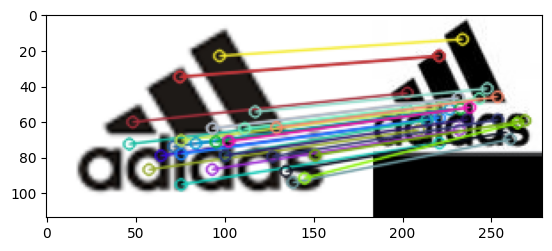

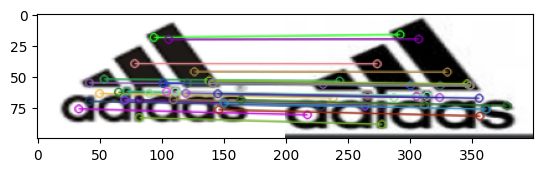

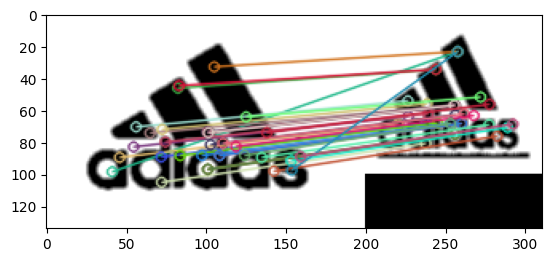

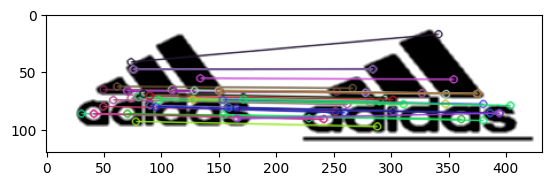

 'logo_1' match 'adidas_19' = % 40
 'logo_1' match2 'adidas_19' = % 47
 'logo_1' match2 'adidas_19' = % 40
 'logo_1' match2 'adidas_19' = % 40


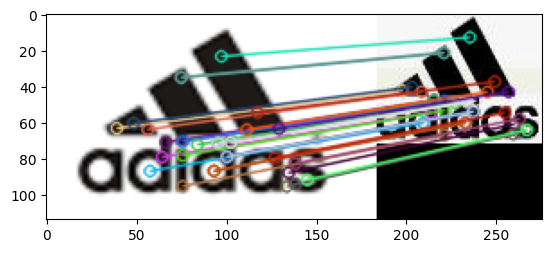

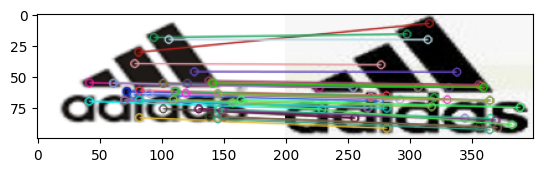

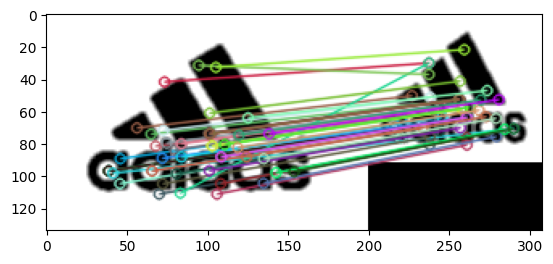

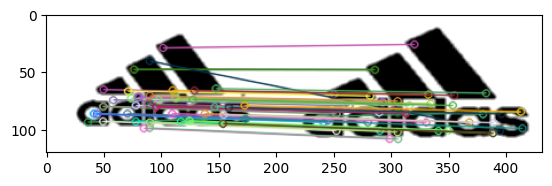

 'logo_1' match 'adidas_18' = % 46
 'logo_1' match2 'adidas_18' = % 57
 'logo_1' match2 'adidas_18' = % 54
 'logo_1' match2 'adidas_18' = % 48


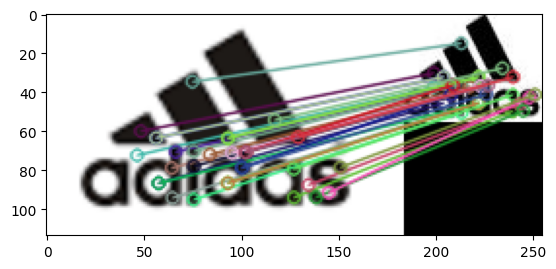

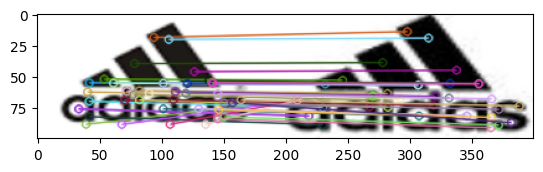

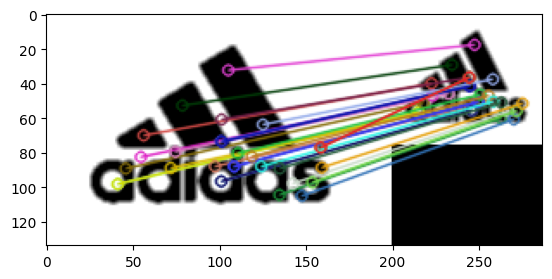

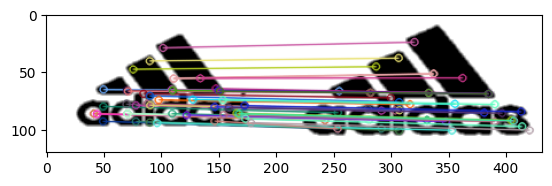

 'logo_1' match 'adidas_20' = % 47
 'logo_1' match2 'adidas_20' = % 63
 'logo_1' match2 'adidas_20' = % 34
 'logo_1' match2 'adidas_20' = % 49


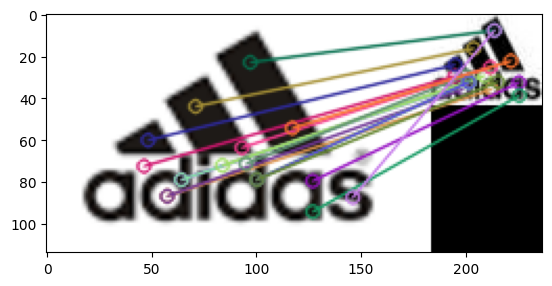

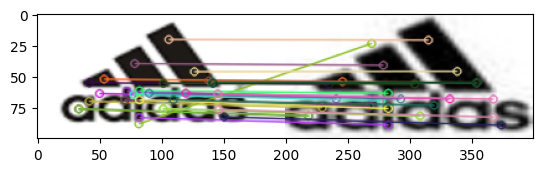

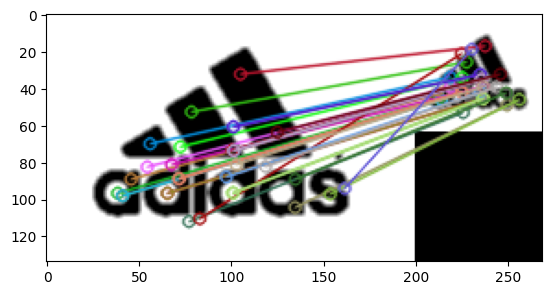

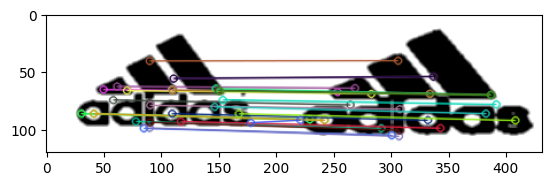

 'logo_1' match 'adidas_21' = % 26
 'logo_1' match2 'adidas_21' = % 43
 'logo_1' match2 'adidas_21' = % 38
 'logo_1' match2 'adidas_21' = % 28


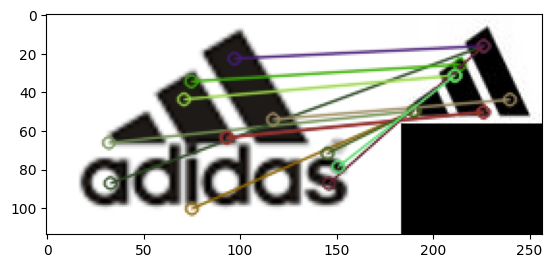

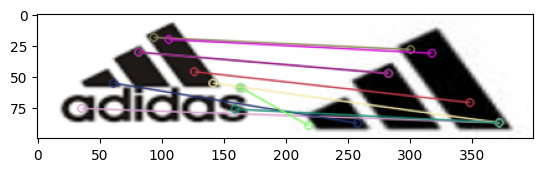

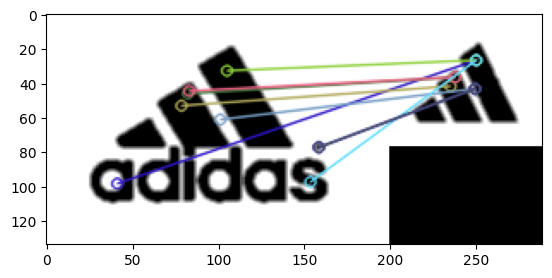

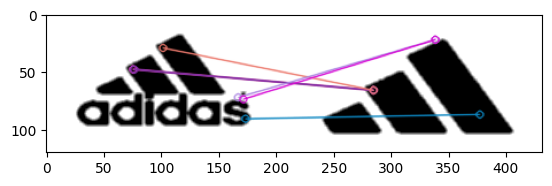

 'logo_1' match 'adidas_10' = % 18
 'logo_1' match2 'adidas_10' = % 15
 'logo_1' match2 'adidas_10' = % 11
 'logo_1' match2 'adidas_10' = % 7


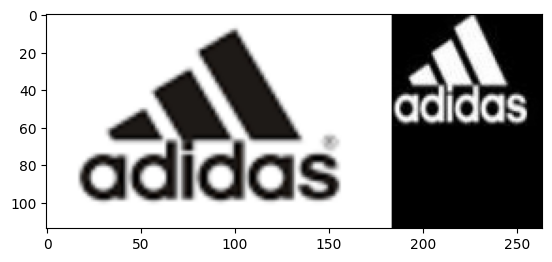

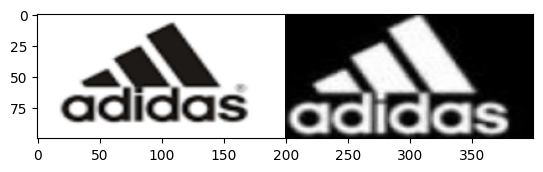

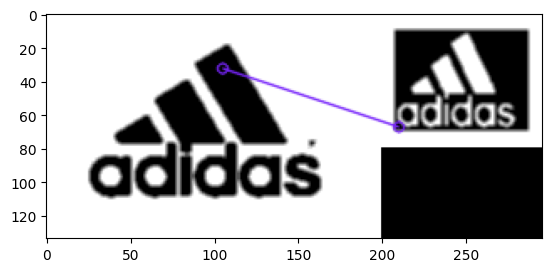

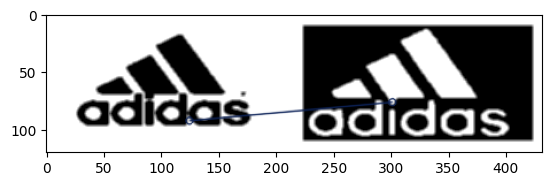

 'logo_1' match 'adidas_11' = % 0
 'logo_1' match2 'adidas_11' = % 0
 'logo_1' match2 'adidas_11' = % 1
 'logo_1' match2 'adidas_11' = % 1


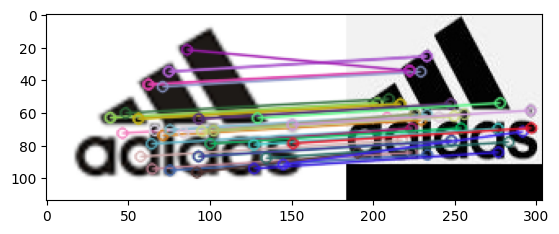

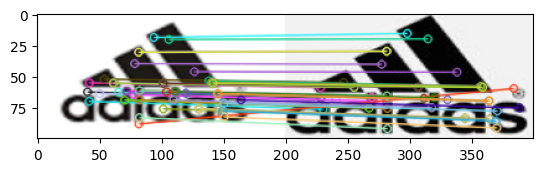

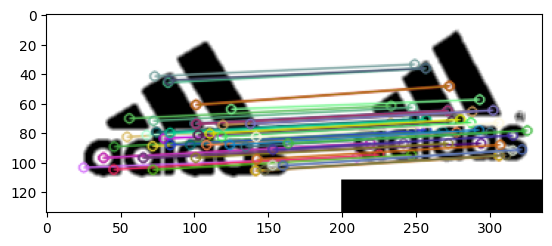

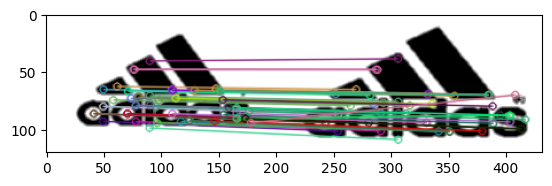

 'logo_1' match 'adidas_13' = % 54
 'logo_1' match2 'adidas_13' = % 66
 'logo_1' match2 'adidas_13' = % 56
 'logo_1' match2 'adidas_13' = % 53


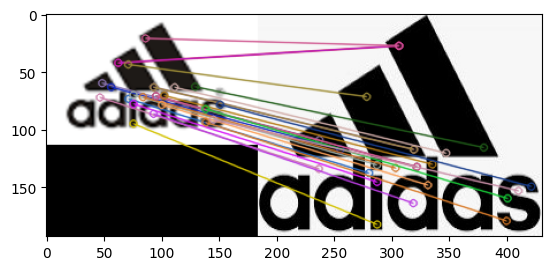

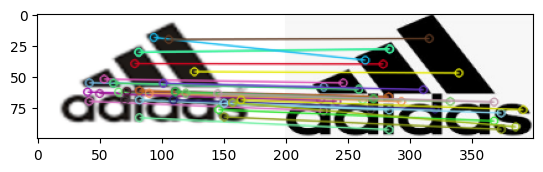

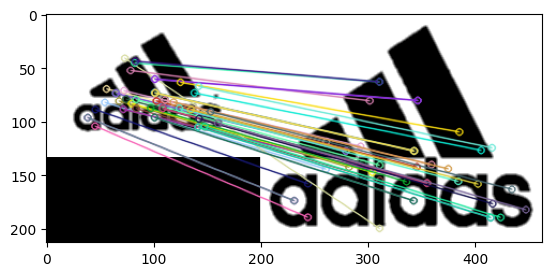

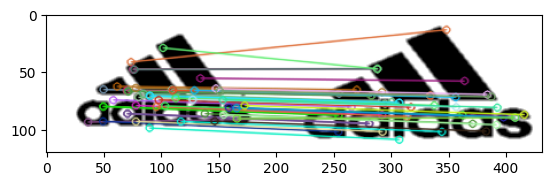

 'logo_1' match 'adidas_12' = % 37
 'logo_1' match2 'adidas_12' = % 47
 'logo_1' match2 'adidas_12' = % 54
 'logo_1' match2 'adidas_12' = % 51


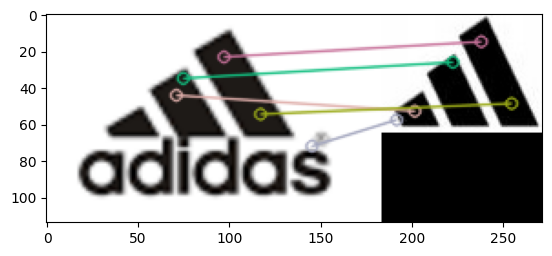

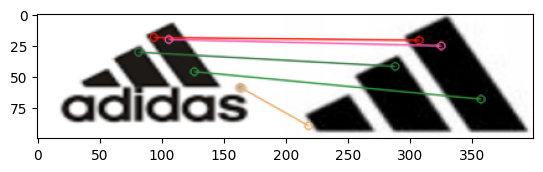

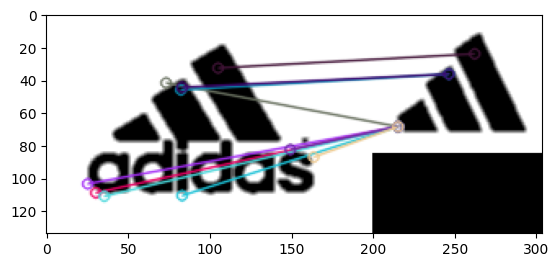

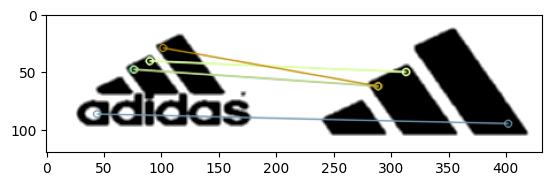

 'logo_1' match 'adidas_16' = % 7
 'logo_1' match2 'adidas_16' = % 7
 'logo_1' match2 'adidas_16' = % 12
 'logo_1' match2 'adidas_16' = % 6


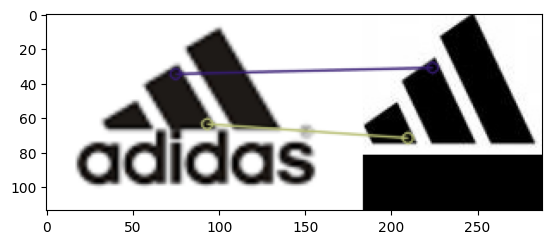

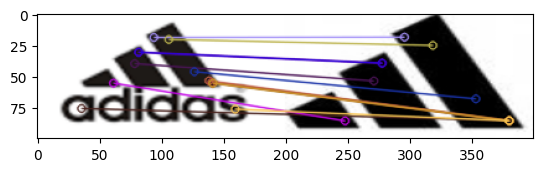

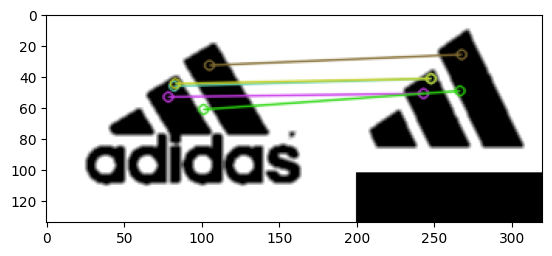

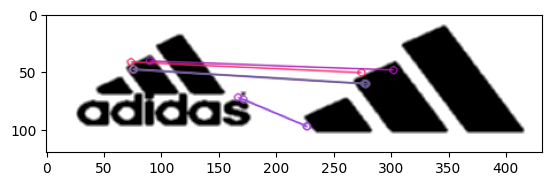

 'logo_1' match 'adidas_17' = % 3
 'logo_1' match2 'adidas_17' = % 19
 'logo_1' match2 'adidas_17' = % 6
 'logo_1' match2 'adidas_17' = % 7


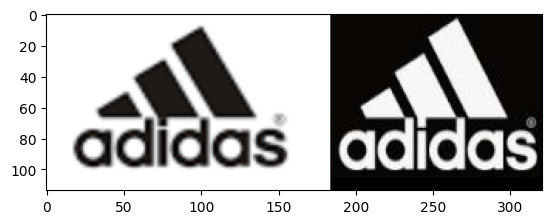

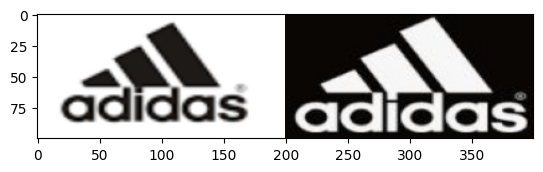

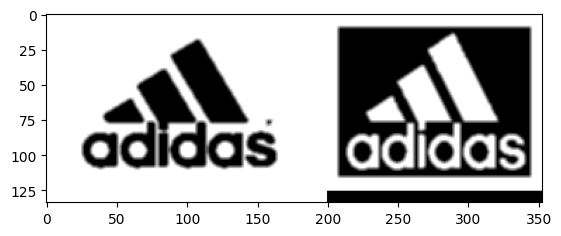

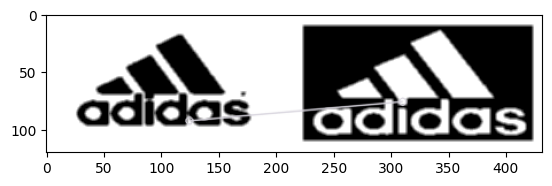

 'logo_1' match 'adidas_15' = % 0
 'logo_1' match2 'adidas_15' = % 0
 'logo_1' match2 'adidas_15' = % 0
 'logo_1' match2 'adidas_15' = % 1


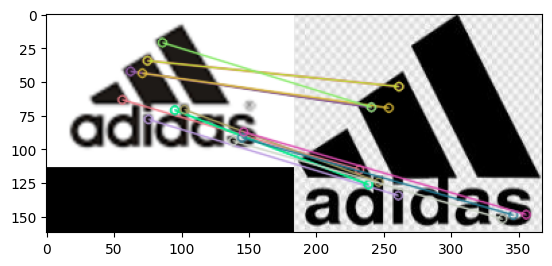

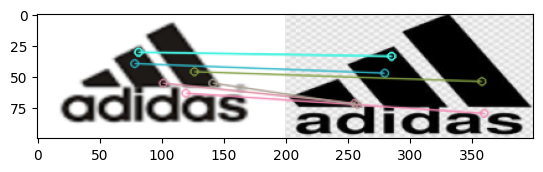

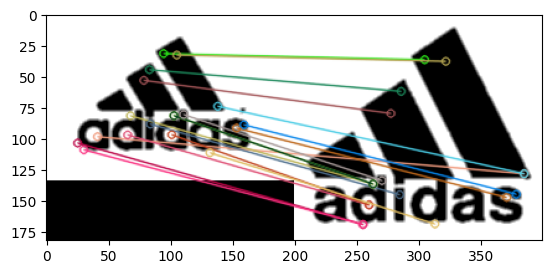

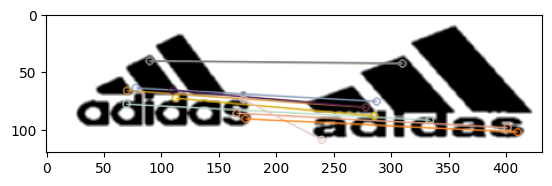

 'logo_1' match 'adidas_14' = % 21
 'logo_1' match2 'adidas_14' = % 10
 'logo_1' match2 'adidas_14' = % 21
 'logo_1' match2 'adidas_14' = % 11


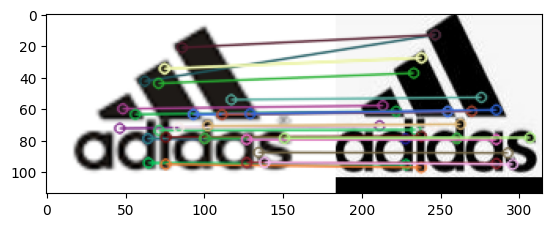

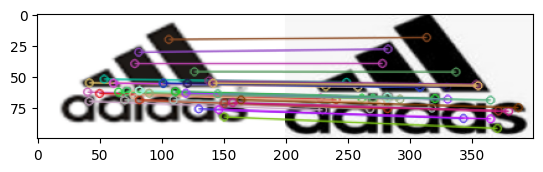

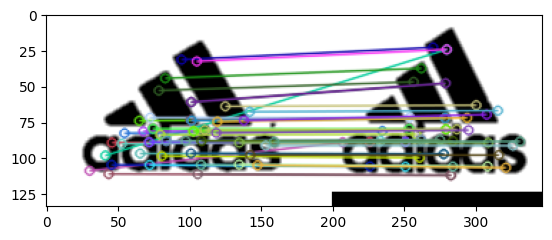

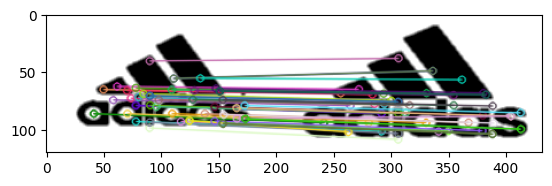

 'logo_1' match 'adidas_8.' = % 41
 'logo_1' match2 'adidas_8.' = % 54
 'logo_1' match2 'adidas_8.' = % 54
 'logo_1' match2 'adidas_8.' = % 51


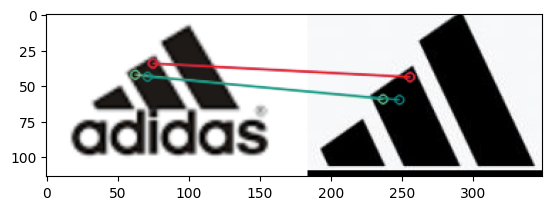

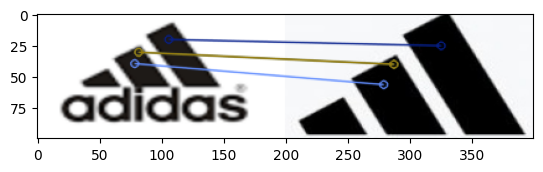

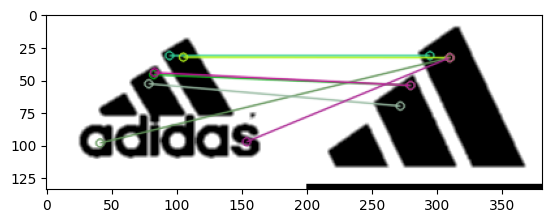

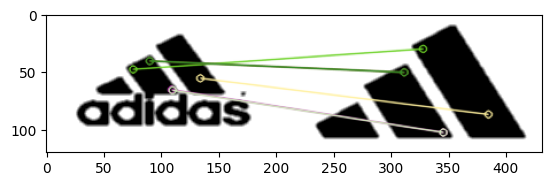

 'logo_1' match 'adidas_9.' = % 6
 'logo_1' match2 'adidas_9.' = % 6
 'logo_1' match2 'adidas_9.' = % 8
 'logo_1' match2 'adidas_9.' = % 6
21


In [8]:

size = "original2"
#avg_size = (18,44)

path_list = os.listdir(f"matching_test/{size}")
counter = 0


a = cv2.imread("matching_test/adidas.png")

for i in path_list:

    b = cv2.imread(f"matching_test/{size}/{i}")


    a_resized = cv2.resize(a,(200,100))
    b_resized = cv2.resize(b,(200,100))

    a_processed = pre_process(a)
    b_processed = pre_process(b)
    
    a_processed2 = pre_process(a_resized)
    b_processed2 = pre_process(b_resized)
   
    match = matcher(a,b)
    match2 = matcher(a_resized,b_resized)
    match3 = matcher(a_processed,b_processed)
    match4 = matcher(a_processed2,b_processed2)



    filter = 60
    #if match > filter or match2>filter:
    print(f" 'logo_1' match '{i[:9]}' = %",match)
    print(f" 'logo_1' match2 '{i[:9]}' = %",match2)
    print(f" 'logo_1' match2 '{i[:9]}' = %",match3)
    print(f" 'logo_1' match2 '{i[:9]}' = %",match4)


    counter +=1
print(counter)



preprocessing

In [ ]:

a = cv2.imread("matching_test/papara_1.jpg",0)
padded = np.pad(a,((8,8),(8,8)),constant_values=(255,255))

ret,thresh1 = cv2.threshold(padded,180,255,cv2.THRESH_BINARY)

blur = cv2.blur(thresh1,(3,3))

plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)) #rgb conversation
plt.show()